# MIPT BioTechDays 2022

In [564]:
import pandas as pd 
import numpy  as np
import mne #for .edf preprocessing

import matplotlib.pyplot as plt
import wfdb #for .atr .dat preprocessing
from scipy.fft import fft, ifft, rfft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### EEG and ECG During Mental Arithmetic Tasks

In [272]:
#high-pass filter
def hpf(x, param = 0.0004):
	y = x.copy()
	
	for n in range(x.shape[0]):
		if(x[n] < param):
			continue
		y.iloc[n] = 2 * y.iloc[n - 1] - y.iloc[n - 2] + x.iloc[n ] - 2 * x.iloc[n - 6] + x.iloc[n - 12] 
	return y

#low-pass filter
def lpf(x, param = 0.0004):
	y = x.copy()
	
	for n in range(x.shape[0]):
		if(x[n] < param):
			continue
		y.iloc[n] = y.iloc[n - 1] - x.iloc[n]/32 + x.iloc[n - 16] - x.iloc[n - 17] + x.iloc[n - 32]/32
	return y

#derrivative of signal
def deriv(x, param = 0.0004):
	y = x.copy()

	for n in range(x.shape[0]):
		if(x[n] < param):
			continue
		y.iloc[n] = (2 * x.iloc[n] + x.iloc[n-1] - x.iloc[n - 3] - 2 * x.iloc[n - 4])/4
	return y

def standard_normalize(x):
	normalizer = StandardScaler()
	normalizer.fit(x)
	return normalizer.transform(x)


def minMax_normalize(x):
	normalizer = MinMaxScaler()
	normalizer.fit(x)
	return normalizer.transform(x)

In [325]:
file       = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject{0}_{1}.edf'
indexes    = ['00', '01', '02', '03', '05', '06', '07', '08', '09', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35']

data_arithmetic = pd.DataFrame(columns = indexes, data=np.zeros([91000, 33]))

for i in indexes:
        data       = mne.io.read_raw_edf(file.format(i, '1'))
        raw_data   = np.array(data.get_data())[20]
        #print(i, raw_data.shape)
        channels   = np.array(data.ch_names)
        data_arithmetic[i] = minMax_normalize(raw_data.reshape(-1, 1))
        info       = data.info

None

Extracting EDF parameters from /home/matthew/Desktop/Programming/Hackathons/BioTech MIPT 2022/eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/matthew/Desktop/Programming/Hackathons/BioTech MIPT 2022/eeg-during-mental-arithmetic-tasks-1.0.0/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/matthew/Desktop/Programming/Hackathons/BioTech MIPT 2022/eeg-during-mental-arithmetic-tasks-1.0.0/Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/matthew/Desktop/Programming/Hackathons/BioTech MIPT 2022/eeg-during-mental-arithmetic-tasks-1.0.0/Subject03_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/matthew/Desktop

In [70]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>

In [323]:
data_arithmetic.shape

(91000, 33)

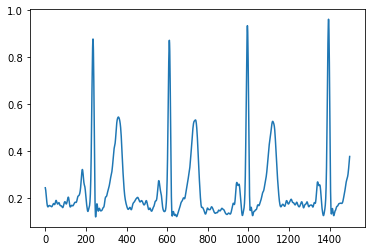

In [327]:
minMax_dat = data_arithmetic['00'].to_numpy().reshape(-1, 1)
minMax_dat = minMax_dat[:1500]
#plt.plot(stand_dat) 
plt.plot(minMax_dat) 
plt.show()
None

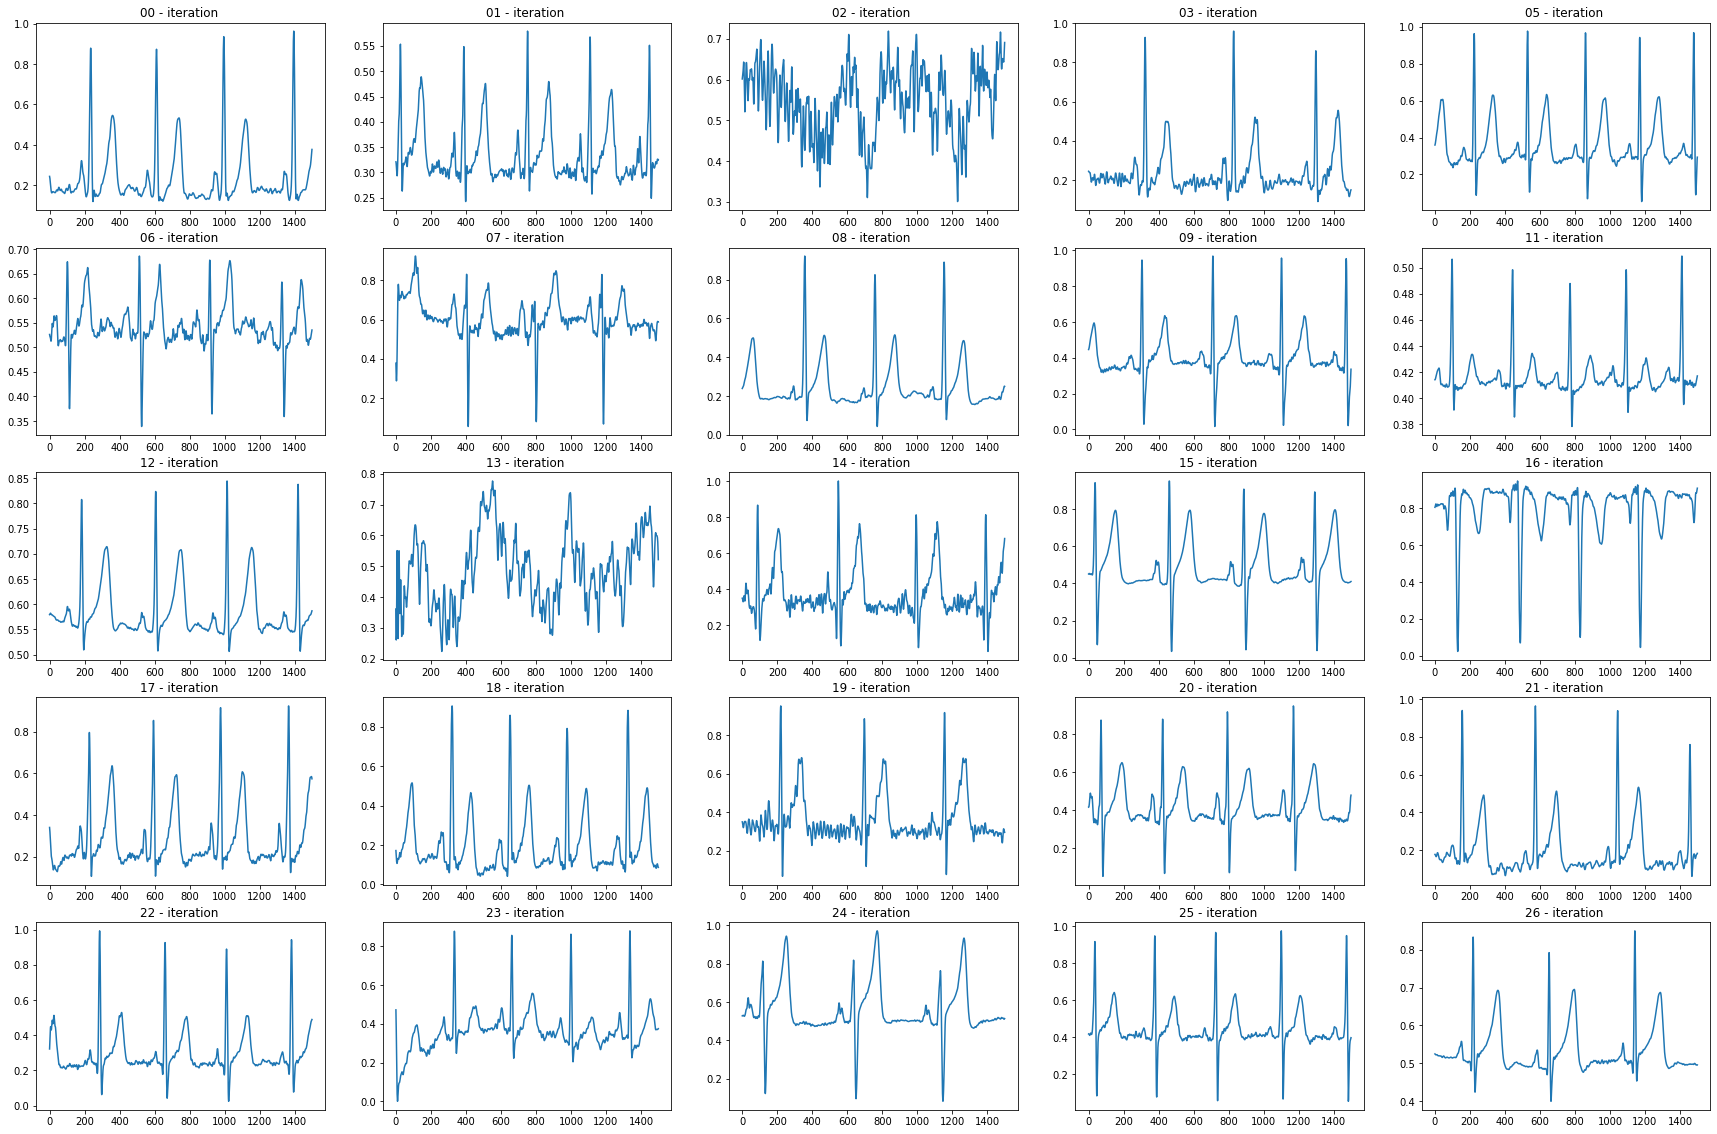

In [328]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 5, ncols = 5)

for i in range(25):i
    ax[(i - 25 )// 5][(i - 25 ) % 5].plot(data_arithmetic[indexes[i]][:1500].to_numpy())
    ax[(i - 25 ) // 5][(i - 25 ) % 5].set_title(indexes[i] + ' - iteration ')

IndexError: list index out of range

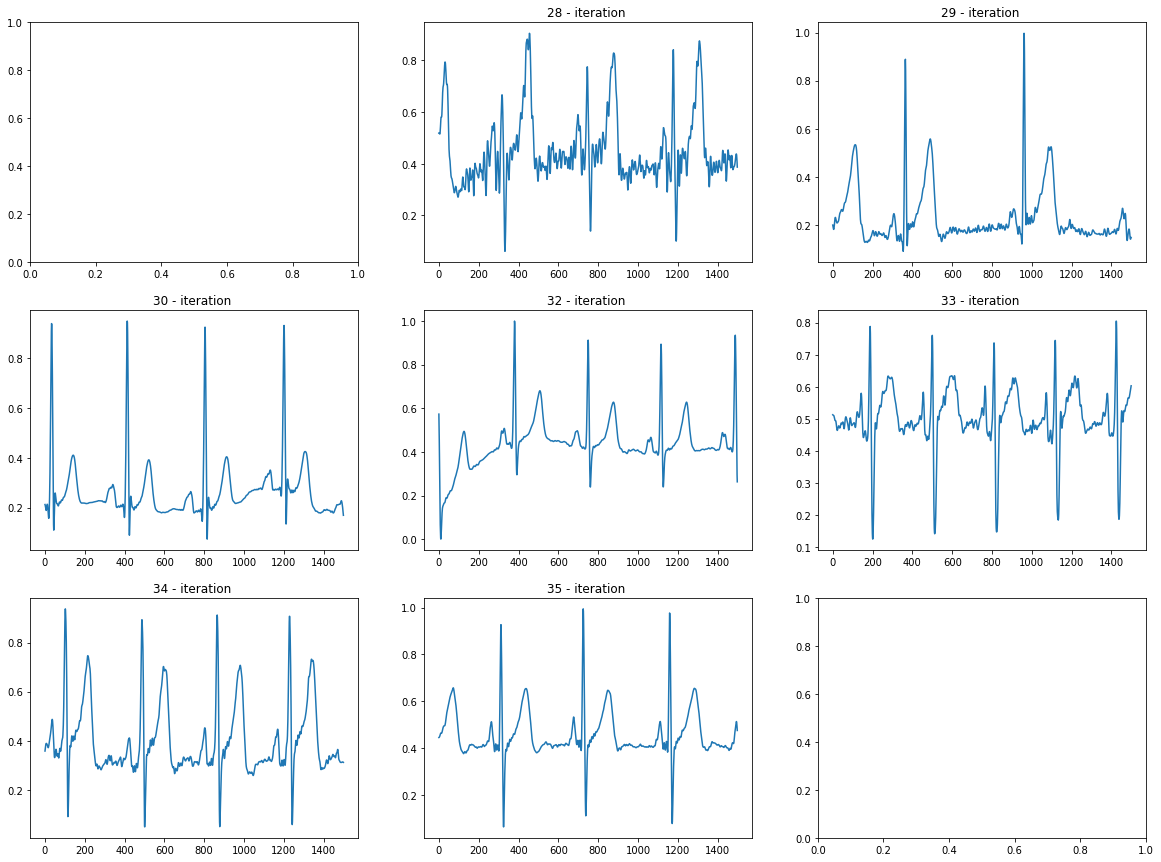

In [482]:
fig, ax = plt.subplots(figsize = (20, 15), nrows = 3, ncols = 3)

for i in range(26, 48):
    if i > len(indexes): 
        pass
    else:
        ax[(i - 25)// 3][(i - 25 ) % 3].plot(data_arithmetic[indexes[i]][:1500].to_numpy())
        ax[(i - 25)// 3][(i - 25 ) % 3].set_title(indexes[i] + ' - iteration ')

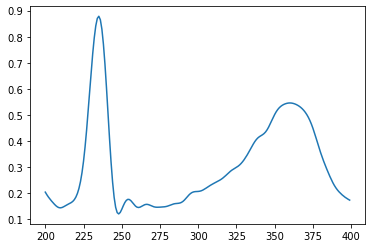

In [366]:
plt.plot(data_arithmetic['00'][200:400])

Kinda pointless to waste time trying handle graphs like `13`, `07`, `02`, `16`, `24`, `28`, so let's analyse data set without lower-peaks and too much noise 

In [336]:
nice_indexes = ['00', '01', '03', '05', '06', '08', '09', '11', '12', '14', '15', '17', '18', '19', '20', '21', '22', '23', '25', '26', '27', '29', '30', '32', '33', '34', '35']

In [440]:
real_times  = np.array([])

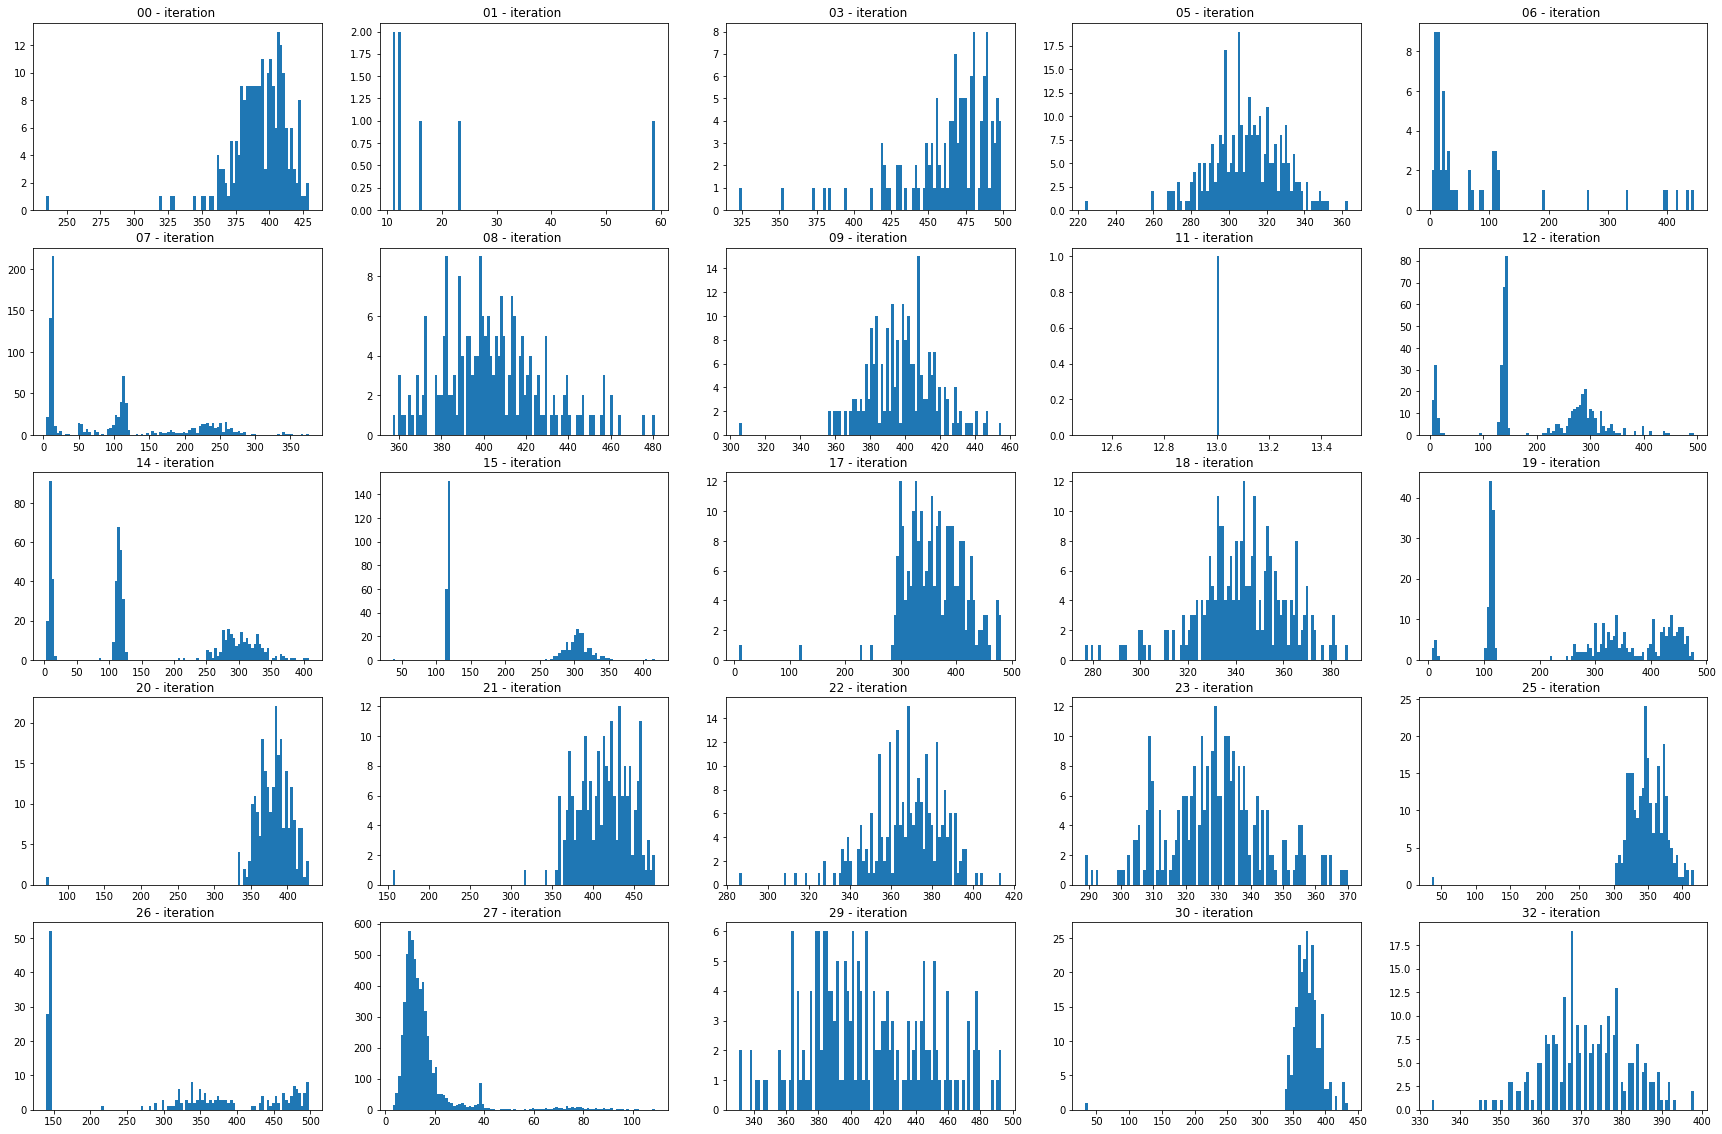

In [454]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 5, ncols = 5)

for counter, k in enumerate(nice_indexes):

    times = data_arithmetic[k]
    delta_times = np.array([])
    for i in range(1, 90999):
        if (times[i] > times[i + 1]) and (times[i] > times[i - 1]) and (times[i] > 0.7):
            delta_times = np.append(delta_times, i)
    #print("TEST {0}: ".format(k))
    delta_times -= np.concatenate(([0], delta_times[:-1]))
    delta_times = delta_times[delta_times < 500]
    
    if counter < 25:
        ax[counter // 5][(counter) % 5].hist(delta_times, bins = 100)
        ax[counter // 5][(counter) % 5].set_title(nice_indexes[counter] + ' - iteration ')

    real_times = np.append(real_times, delta_times[delta_times > 150])


Those strange graphs like `01`, `06`, `12`, `19` ,`26`, were got due to incorrect time snippet interpretation

In [492]:
nice_indexes_2 = ['00', '03', '05', '08', '09', '14', '11', '15', '17', '18', '20', '21', '22', '23', '25', '27', '29', '30', '32', '33', '34', '35']

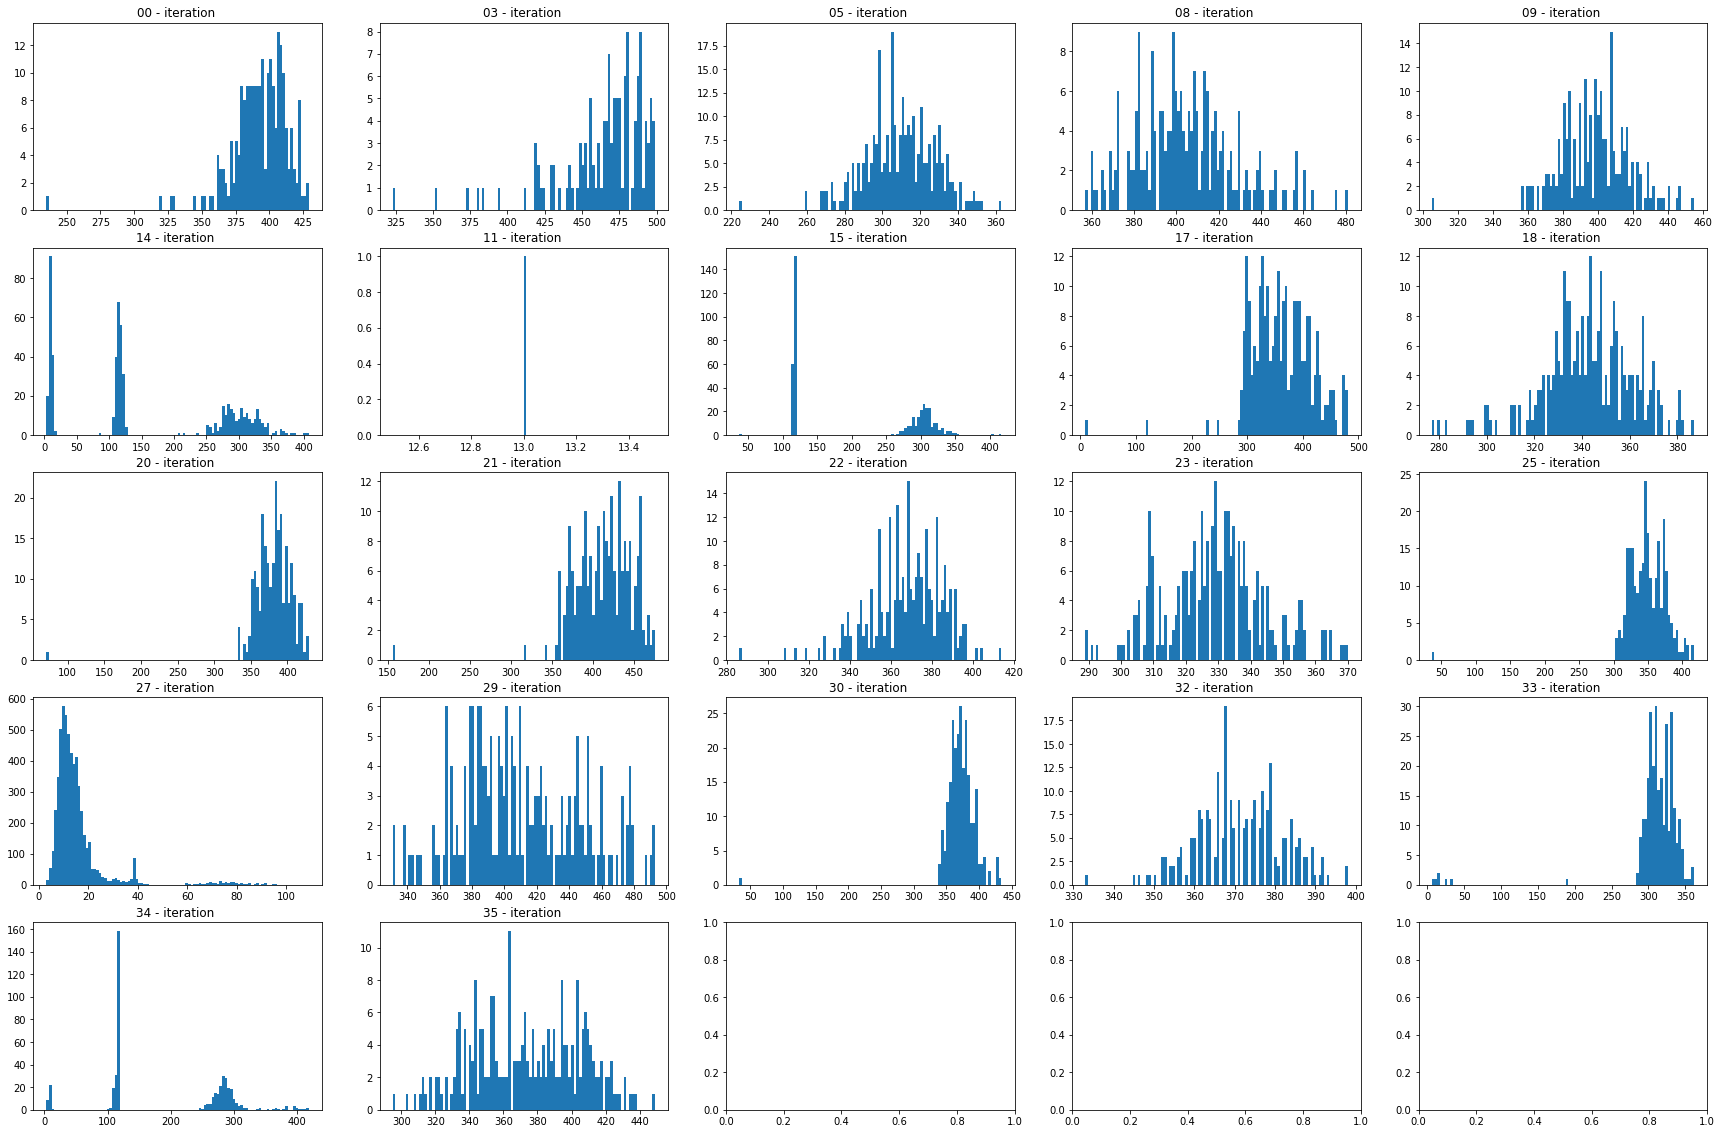

In [477]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 5, ncols = 5)
real_times = []

for counter, k in enumerate(nice_indexes_2):

    times = data_arithmetic[k]
    delta_times = np.array([])
    for i in range(1, 90999):
        if (times[i] > times[i + 1]) and (times[i] > times[i - 1]) and (times[i] > 0.7):
            delta_times = np.append(delta_times, i)
    #print("TEST {0}: ".format(k))
    delta_times -= np.concatenate(([0], delta_times[:-1]))
    delta_times = delta_times[delta_times < 500]
    
    if counter < 25:
        ax[counter // 5][(counter) % 5].hist(delta_times, bins = 100)
        ax[counter // 5][(counter) % 5].set_title(nice_indexes_2[counter] + ' - iteration ')
        
    real_times = np.append(real_times, delta_times)


In [510]:
real_times = real_times[real_times > 200] / 500

(array([  1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,
          0.,   1.,   2.,   0.,   5.,   6.,   7.,   9.,  10.,  12.,  17.,
         17.,  30.,  22.,  41.,  47.,  50.,  60.,  60.,  60.,  73.,  73.,
        100.,  92.,  94.,  77.,  40.,  79.,  86.,  92., 105.,  99., 115.,
         81.,  78.,  88.,  79.,  78.,  52.,  86.,  96.,  99., 117., 120.,
        141., 127.,  98., 130., 117., 131., 108.,  68.,  93.,  89.,  83.,
         87.,  70.,  87.,  68.,  61.,  59.,  39.,  51.,  28.,  19.,  26.,
         24.,  18.,  23.,  11.,  18.,  17.,  18.,  17.,  20.,  12.,   6.,
         10.,  12.,  13.,  14.,  15.,  15.,   1.,   7.,  13.,   7.,   4.,
          8.]),
 array([0.414  , 0.41984, 0.42568, 0.43152, 0.43736, 0.4432 , 0.44904,
        0.45488, 0.46072, 0.46656, 0.4724 , 0.47824, 0.48408, 0.48992,
        0.49576, 0.5016 , 0.50744, 0.51328, 0.51912, 0.52496, 0.5308 ,
        0.53664, 0.54248, 0.54832, 0.55416, 0.56   , 0.56584, 0.57168,
        0.57752, 0.58336, 0.5892 ,

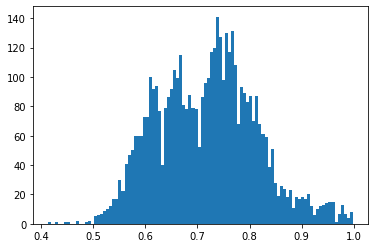

In [511]:
plt.hist(real_times, bins = 100)

### The MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database

In [485]:
data          = pd.read_csv('archive/mitbih_train.csv')
data_test     = pd.read_csv('archive/mitbih_test.csv')
data_normal   = pd.read_csv('archive/ptbdb_normal.csv')
data_abnormal = pd.read_csv('archive/ptbdb_abnormal.csv')

In [486]:
data.head(10)

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.985507,0.880435,0.518116,0.213768,0.126812,0.119565,0.083333,0.079710,0.065217,0.068841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [487]:
data_test.head(10)

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.797260,0.320548,0.043836,0.049315,0.065753,0.030137,0.008219,0.005479,0.010959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.909408,0.975610,0.533101,0.134146,0.066202,0.000000,0.010453,0.012195,0.031359,0.146341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.927803,0.866359,0.299539,0.000000,0.231951,0.317972,0.274962,0.262673,0.270353,0.268817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.914230,0.473684,0.000000,0.064327,0.317739,0.405458,0.391813,0.382066,0.401559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.997429,0.861183,0.365039,0.071979,0.082262,0.100257,0.074550,0.051414,0.051414,0.043702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [488]:
data_normal.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [490]:
time_ = data.columns

In [491]:
print(time_)

Index(['9.779411554336547852e-01', '9.264705777168273926e-01',
       '6.813725233078002930e-01', '2.450980395078659058e-01',
       '1.544117629528045654e-01', '1.911764740943908691e-01',
       '1.519607901573181152e-01', '8.578431606292724609e-02',
       '5.882352963089942932e-02', '4.901960864663124084e-02',
       ...
       '0.000000000000000000e+00.79', '0.000000000000000000e+00.80',
       '0.000000000000000000e+00.81', '0.000000000000000000e+00.82',
       '0.000000000000000000e+00.83', '0.000000000000000000e+00.84',
       '0.000000000000000000e+00.85', '0.000000000000000000e+00.86',
       '0.000000000000000000e+00.87', '0.000000000000000000e+00.88'],
      dtype='object', length=188)


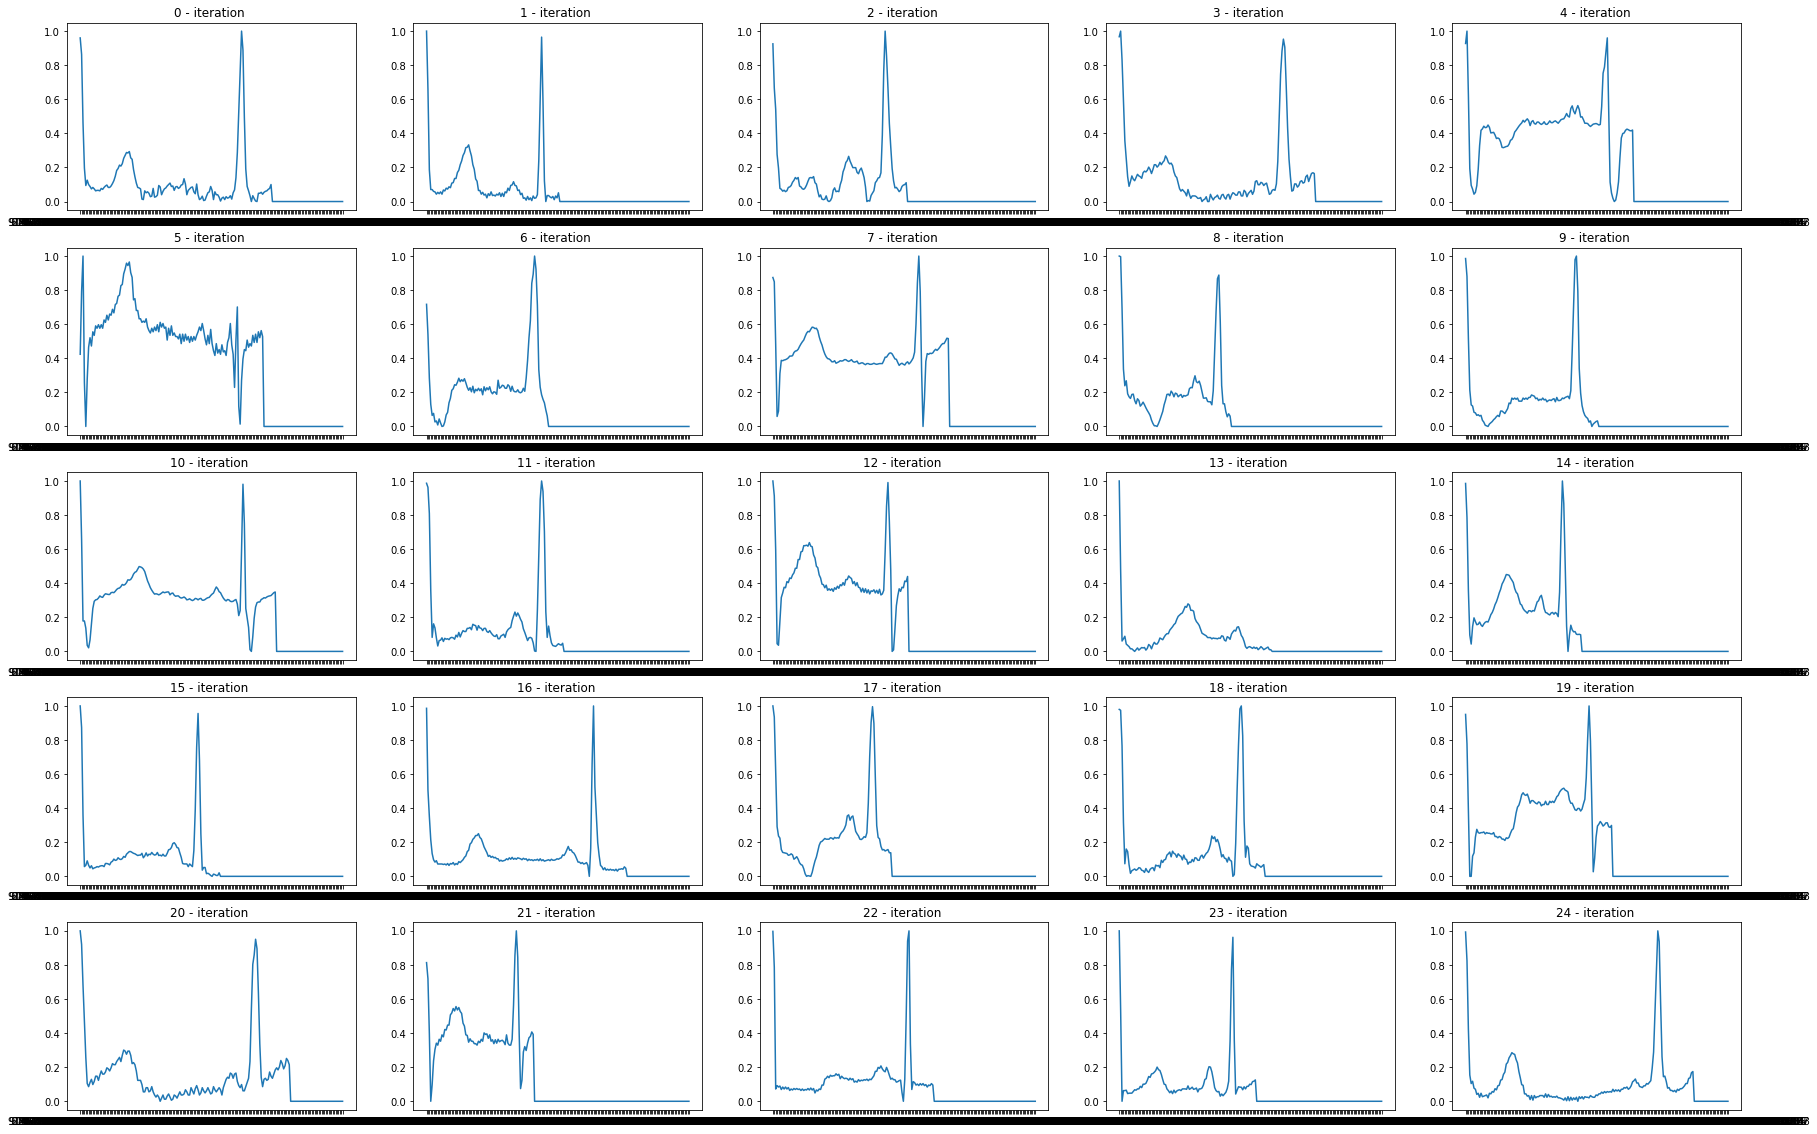

In [493]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 5, ncols = 5)

for i in range(25):
    ax[i // 5][i % 5].plot(time_, data[i:i+1].to_numpy()[0])
    ax[i // 5][i % 5].set_title(str(i) + ' - iteration ')

plt.show()

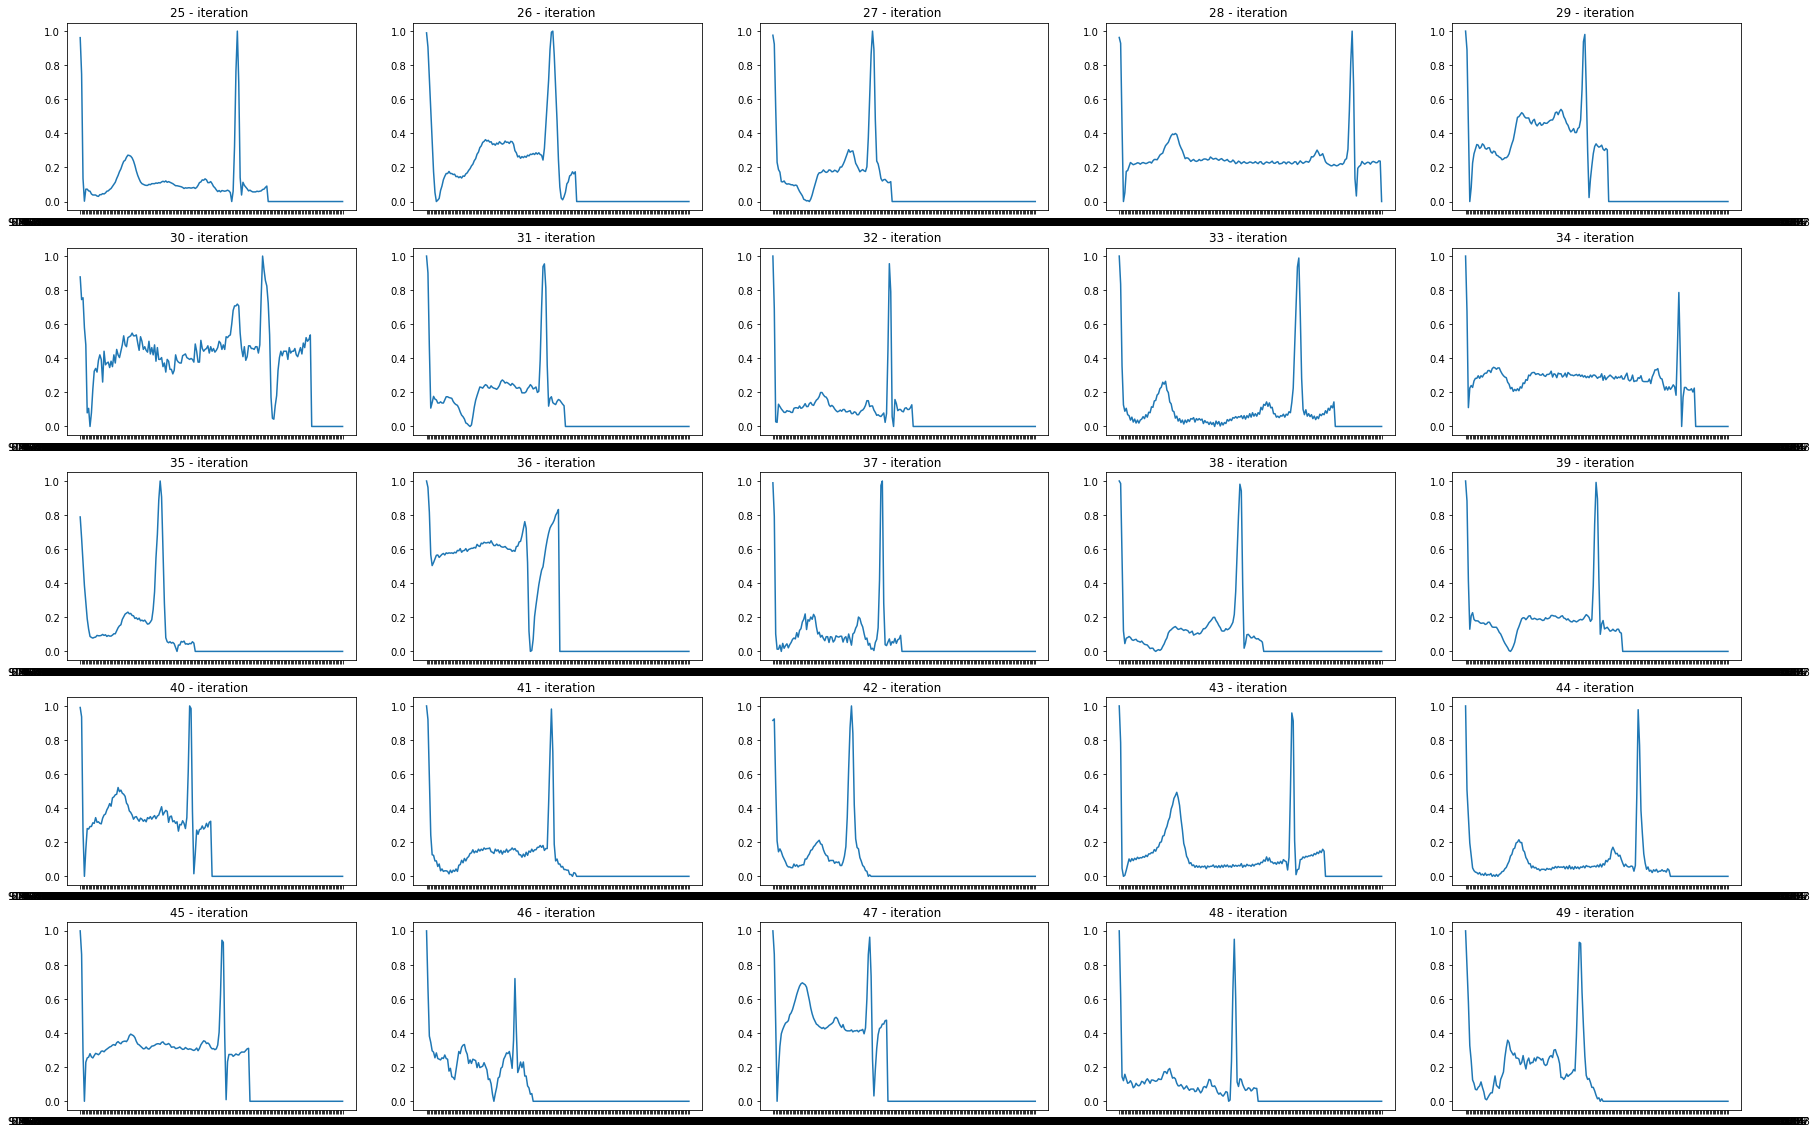

In [494]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 5, ncols = 5)

for i in range(25, 50):
    ax[(i - 25 ) // 5][(i - 25 ) % 5].plot(time_, data[i:i+1].to_numpy()[0])
    ax[(i - 25 ) // 5][(i - 25 ) % 5].set_title(str(i) + ' - iteration ')

In [521]:
times_of_peaks = np.array([])

In [522]:
for i in range(data.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data[i:i+1].to_numpy()[0][5:].argmax()])

In [523]:
for i in range(data_test.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data_test[i:i+1].to_numpy()[0][5:].argmax()])

In [524]:
for i in range(data_normal.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data_normal[i:i+1].to_numpy()[0][5:].argmax()])

In [525]:
for i in range(data_abnormal.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data_abnormal[i:i+1].to_numpy()[0][5:].argmax()])

In [526]:
times_of_peaks.shape[0] == data.shape[0] + data_test.shape[0] + data_normal.shape[0] + data_abnormal.shape[0]

True

In [528]:
times_of_peaks = times_of_peaks / 125


In [530]:
times_of_peaks = times_of_peaks[times_of_peaks < 1.4]

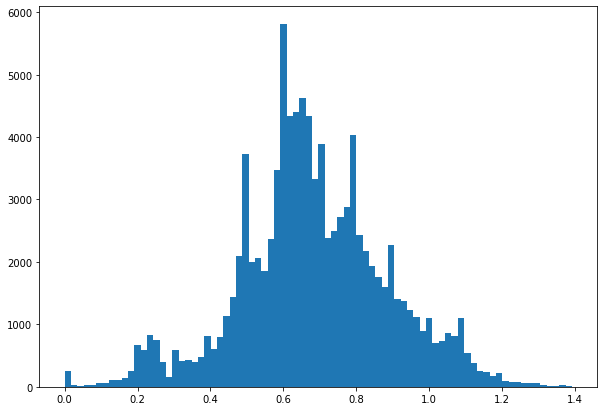

In [531]:
plt.figure(figsize = (10, 7))
plt.hist(times_of_peaks, bins = 80)
plt.show()

In [532]:
NN = np.append(times_of_peaks, real_times).copy()

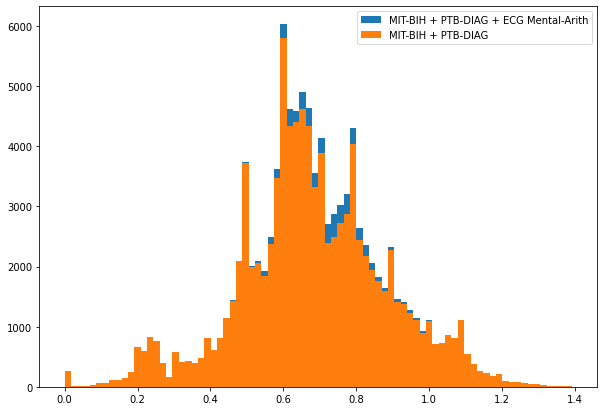

In [537]:
plt.figure(figsize = (10, 7))
plt.hist(NN, bins = 80, label = 'MIT-BIH + PTB-DIAG + ECG Mental-Arith')
plt.hist(times_of_peaks, bins = 80, label = 'MIT-BIH + PTB-DIAG')
plt.legend()
plt.show()

### Metrics Evaluation:

In [539]:
SDNN  = np.zeros(len(NN) // (180 * 5) - 1)
RMSSD = np.zeros(len(NN) // (180 * 5) - 1)
SDSD  = np.zeros(len(NN) // (180 * 5) - 1)

for i in range(len(NN) // (180 * 5) - 1):
    N = len(arr)

    arr        = NN[180 * i: 180 * (i + 5) + 1]
    average    = sum(arr) / N
    Dispersion = sum([(arr[i] - average) ** 2 for i in range(len(arr))]) / N
    sigma      = Dispersion ** 0.5

    #for SDNN
    SDNN[i]    = sigma
    
    #for RMSSD
    RMSSD[i] = sum([(arr[i] - arr[i + 1]) ** 2 for i in range(N - 1)])

    #for SDSD
    SDSD[i] = (sum([(arr[i] - arr[i + 1]) ** 2 for i in range(N - 1)]) / N) ** 0.5

#### SDNN for 5 minut intervals:

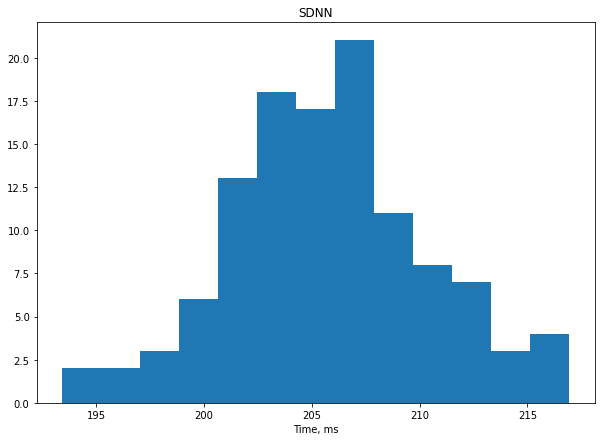

In [686]:
plt.figure(figsize = (10, 7))
plt.title('SDNN')
plt.hist(SDNN * 1000, bins = 13)
plt.xlabel('Time, ms')
plt.show()

#### RMSSD for 5 minut intervals:

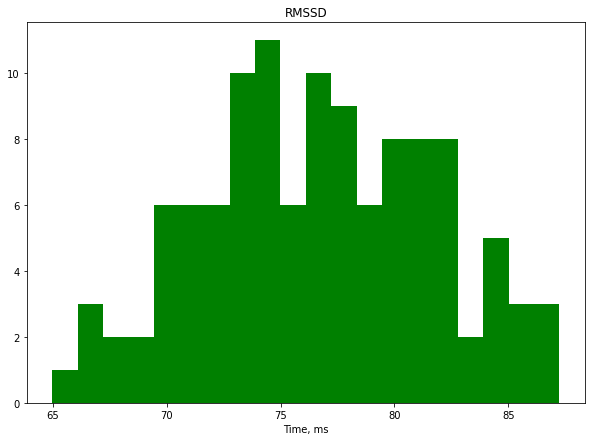

In [688]:
plt.figure(figsize = (10, 7))
plt.title('RMSSD')
plt.hist(RMSSD, bins = 20, color = 'Green')
plt.xlabel('Time, ms')
plt.show()

#### SDSD for 5 minut intervals:

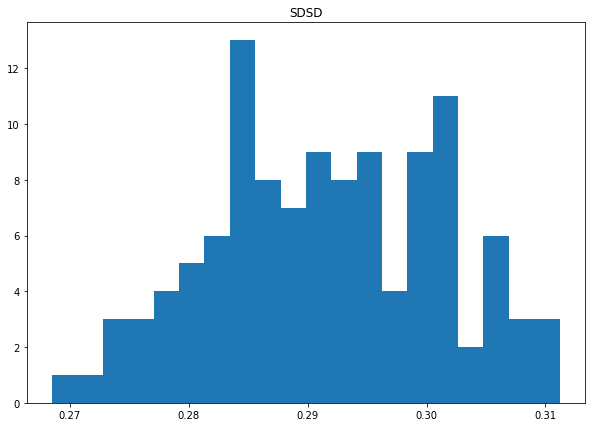

In [689]:
plt.figure(figsize = (10, 7))
plt.title('SDSD')
plt.hist(SDSD, bins = 20)
plt.show()

#### NN50:

In [562]:
NN50 = abs(NN[1:] - NN[:-1])
NN50 = NN50[NN50 <= 0.05]
print('NN50 quantity:   ', len(NN50))
print('NN50 ratio: \t ', round(len(NN50) / len(NN), 2))

NN50 quantity:    19704
NN50 ratio: 	  0.19


#### NN20:

In [563]:
NN20 = abs(NN[1:] - NN[:-1])
NN20 = NN20[NN20 <= 0.02]
print('NN20 quantity:   ', len(NN20))
print('NN20 ratio: \t ', round(len(NN20) / len(NN), 2))

NN20 quantity:    8488
NN20 ratio: 	  0.08


### Fast Furiet Transformation

In [703]:
fft_data_0 = data_normal[0:1].to_numpy()[0]
fft_data_1 = data_normal[1:2].to_numpy()[0]
fft_data_2 = data_normal[2:3].to_numpy()[0]
fft_data_3 = data_normal[3:4].to_numpy()[0]

In [704]:
y_fft_1 = fft(fft_data_0)
y_fft_2 = fft(fft_data_1)
y_fft_3 = fft(fft_data_2)
y_fft_4 = fft(fft_data_3)
x_fft   = fftfreq(time_.shape[0], 1 / time_.shape[0])

/home/matthew/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


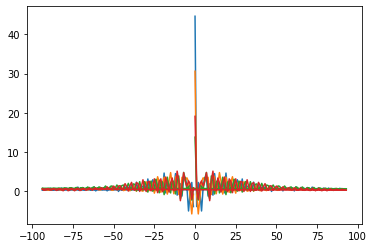

In [705]:
plt.plot(x_fft, y_fft_1)
plt.plot(x_fft, y_fft_2)
plt.plot(x_fft, y_fft_3)
plt.plot(x_fft, y_fft_4)

### Non-EEG Dataset for Assessment of Neurological Status

First  relax period - [0; 300] s

Second relax period - [600; 900] s

Third relax period - [1240; 1540] s

Fourth relax period - [1900; 2200] s


First sport period - [300; 600] s




Waiting - [1540; 1600]



First cognitive stress period - [900; 940] s

First emotional stress period - [940; 1240] s

Second emotional stress period - [1600; 1900] s




*Note: We had not originally intended to count the reading of the instructions to count backwards as an emotional stress. After all, instructions were given for each of the tasks. Unlike the other instruction sets, however, this one created a stress response in many of the volunteers that was obvious to the test administrator as the test was being given.*

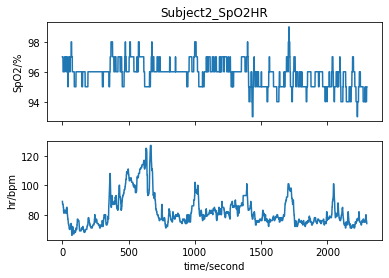

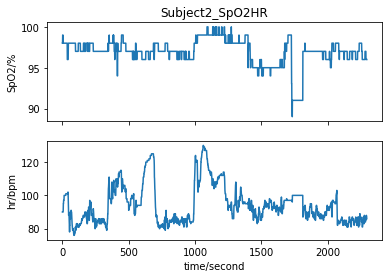

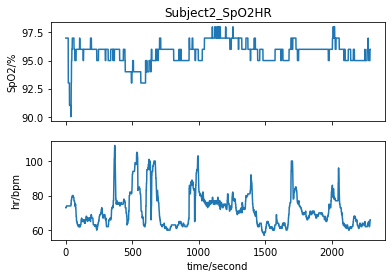

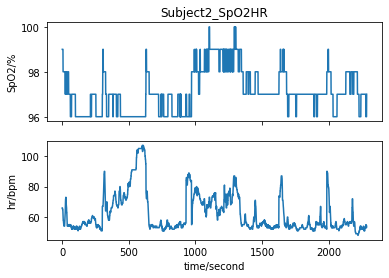

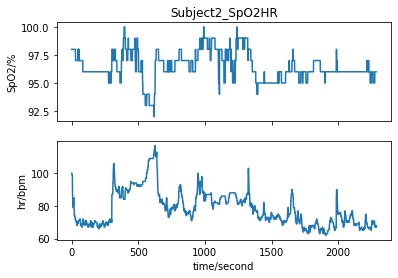

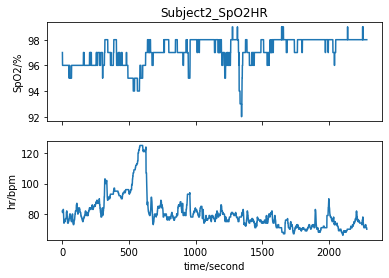

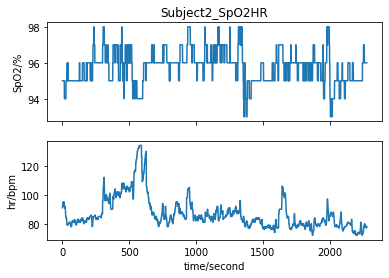

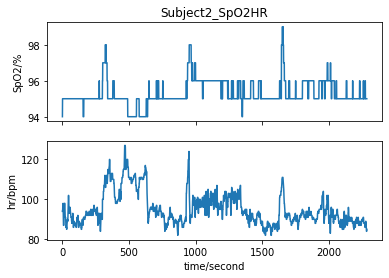

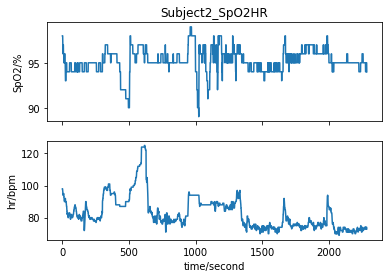

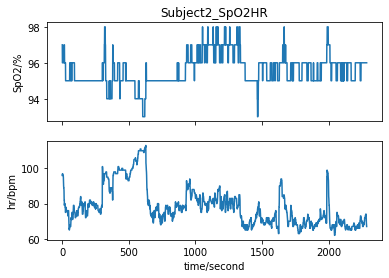

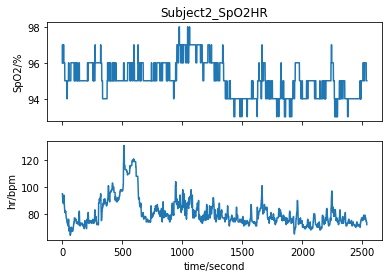

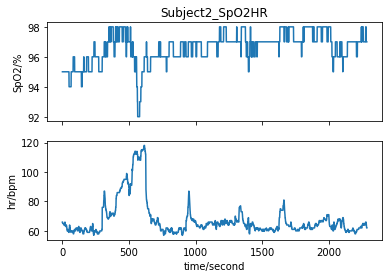

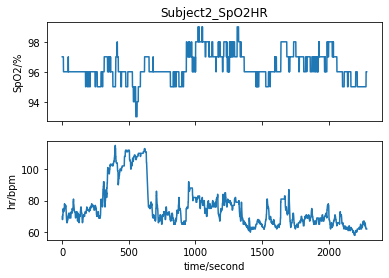

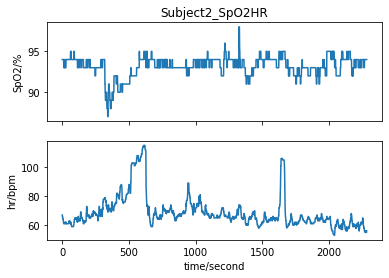

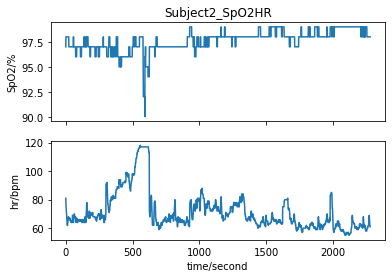

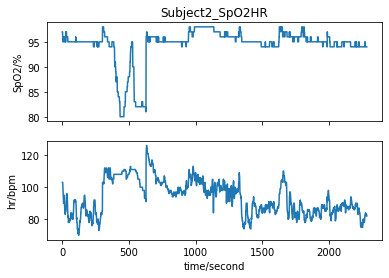

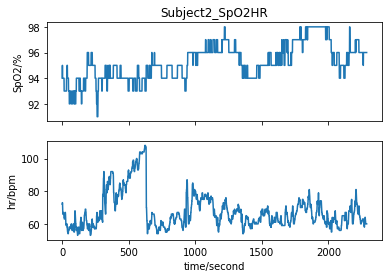

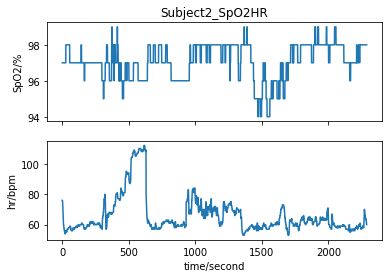

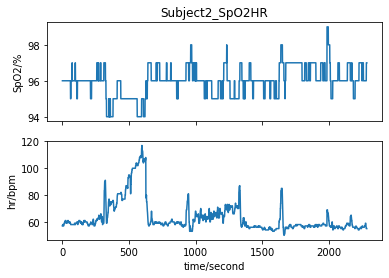

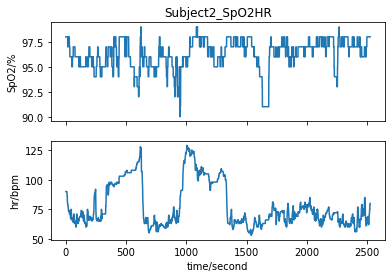

In [641]:
indexes_neuro = [str(i) for i in range(1, 21)]
#columns_neuro = 'hr/bpm ' + np.array(indexes_neuro).astype(str)

neuro_data = pd.DataFrame(columns = indexes_neuro, data = np.zeros([2538, 20]))

for i in indexes_neuro:
    HR__ = wfdb.rdrecord('non-eeg-dataset-for-assessment-of-neurological-status-1.0.0/Subject{0}_SpO2HR'.format(i))
    wfdb.plot_wfdb(HR__, title = 'Subject2_SpO2HR') 

    data__ = pd.DataFrame(columns = ['Sp02HR', 'hr/bpm'], data = HR__ .__dict__['p_signal'])
    neuro_data[i] = np.append(data__['hr/bpm'].to_numpy(), np.zeros(2538 - data__.shape[0]))

#### First Relax vs First Physical period ECG

Physical heart rate approximately greater than relax in  1.3195253474896158 +- 0.011067101380208765


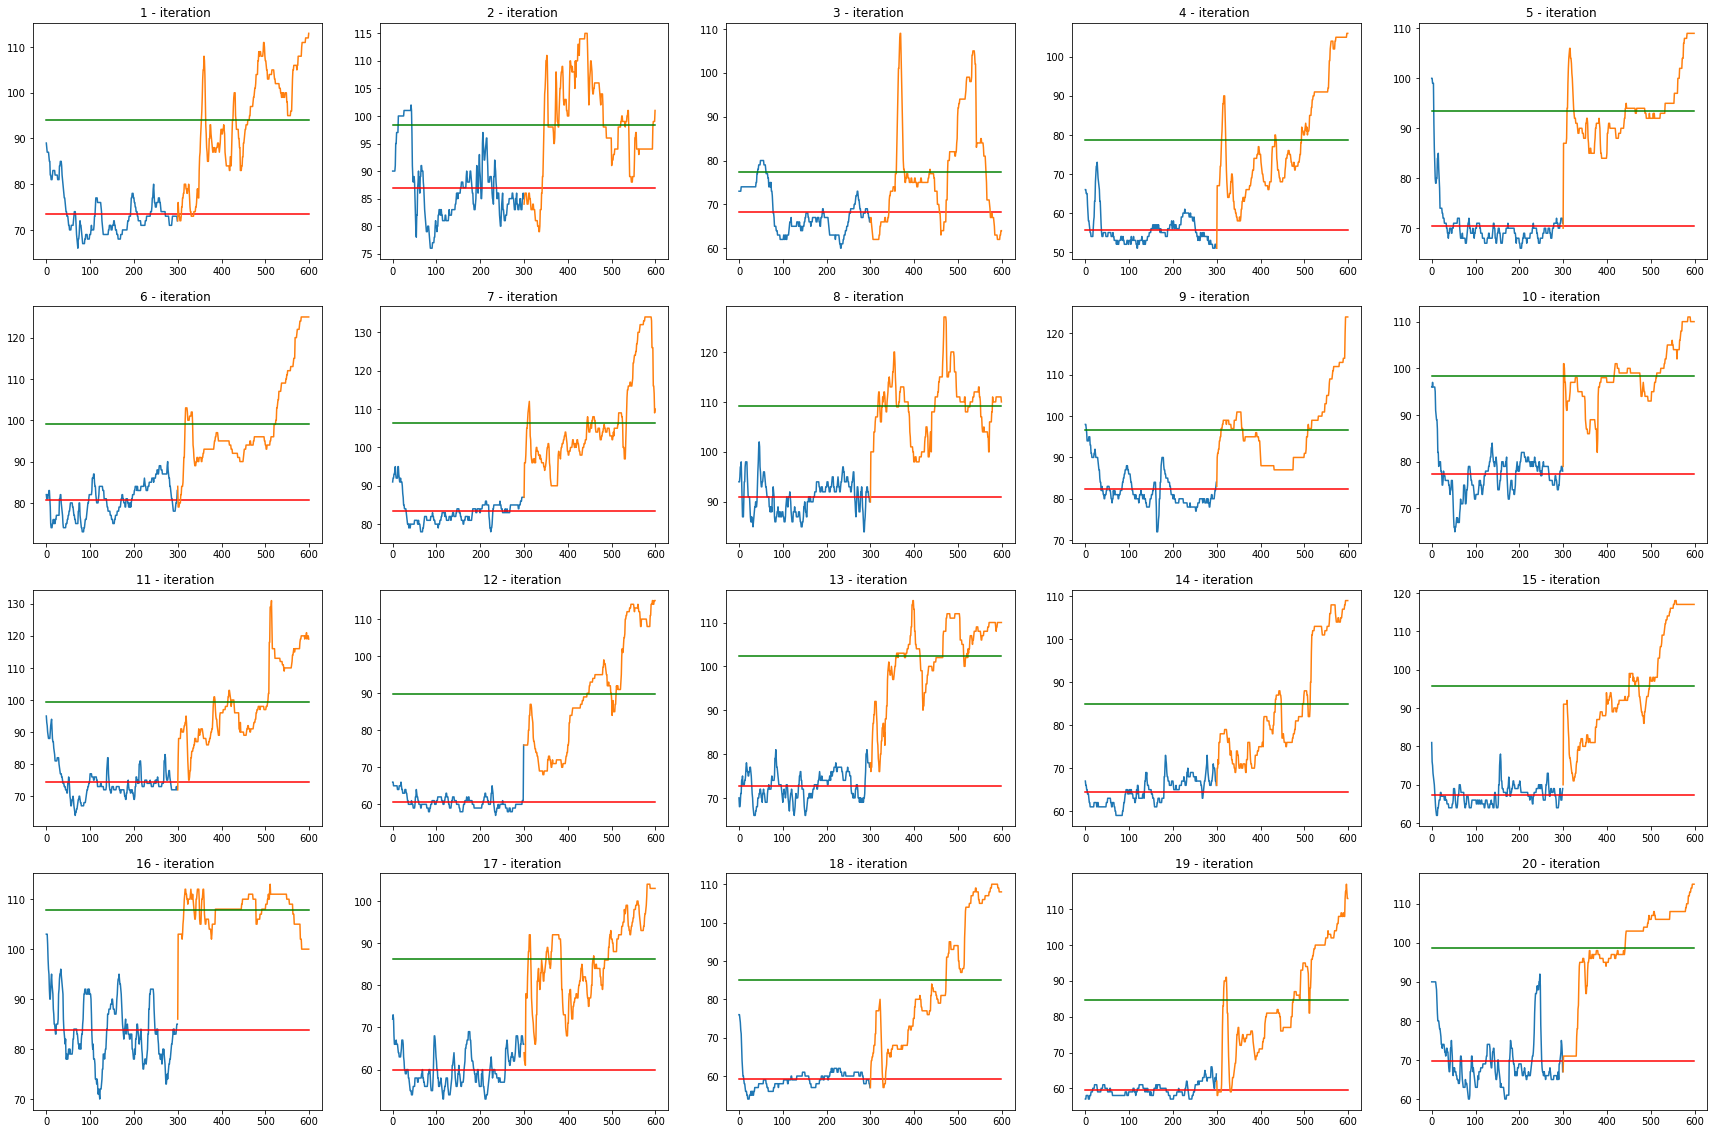

In [681]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 4, ncols = 5)
medium_ratios = np.array([])

for counter, k in enumerate(indexes_neuro):

    ax[(counter) // 5][counter % 5].plot(neuro_data[k][:300],    label = 'First Relax Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(600) * neuro_data[k][:300].mean(), label = 'Mean Relax', color = 'Red')
    ax[(counter) // 5][counter % 5].plot(neuro_data[k][300:600], label = 'First Physical Work Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(600) * neuro_data[k][300:600].mean(), label = 'Mean Physical', color = 'Green')

    ax[(counter) // 5][counter % 5].set_title(indexes_neuro[counter] + ' - iteration ')
    medium_ratios = np.append(medium_ratios, neuro_data[k][300:600].mean() / neuro_data[k][:300].mean())

print('Physical heart rate approximately greater than relax in ', medium_ratios.mean(), '+-', medium_ratios.var())

#### First Relax vs First Emotional Stress period ECG

Emotional Stress rate approximately greater than relax in  1.1562361213668069 +- 0.015159364872955397


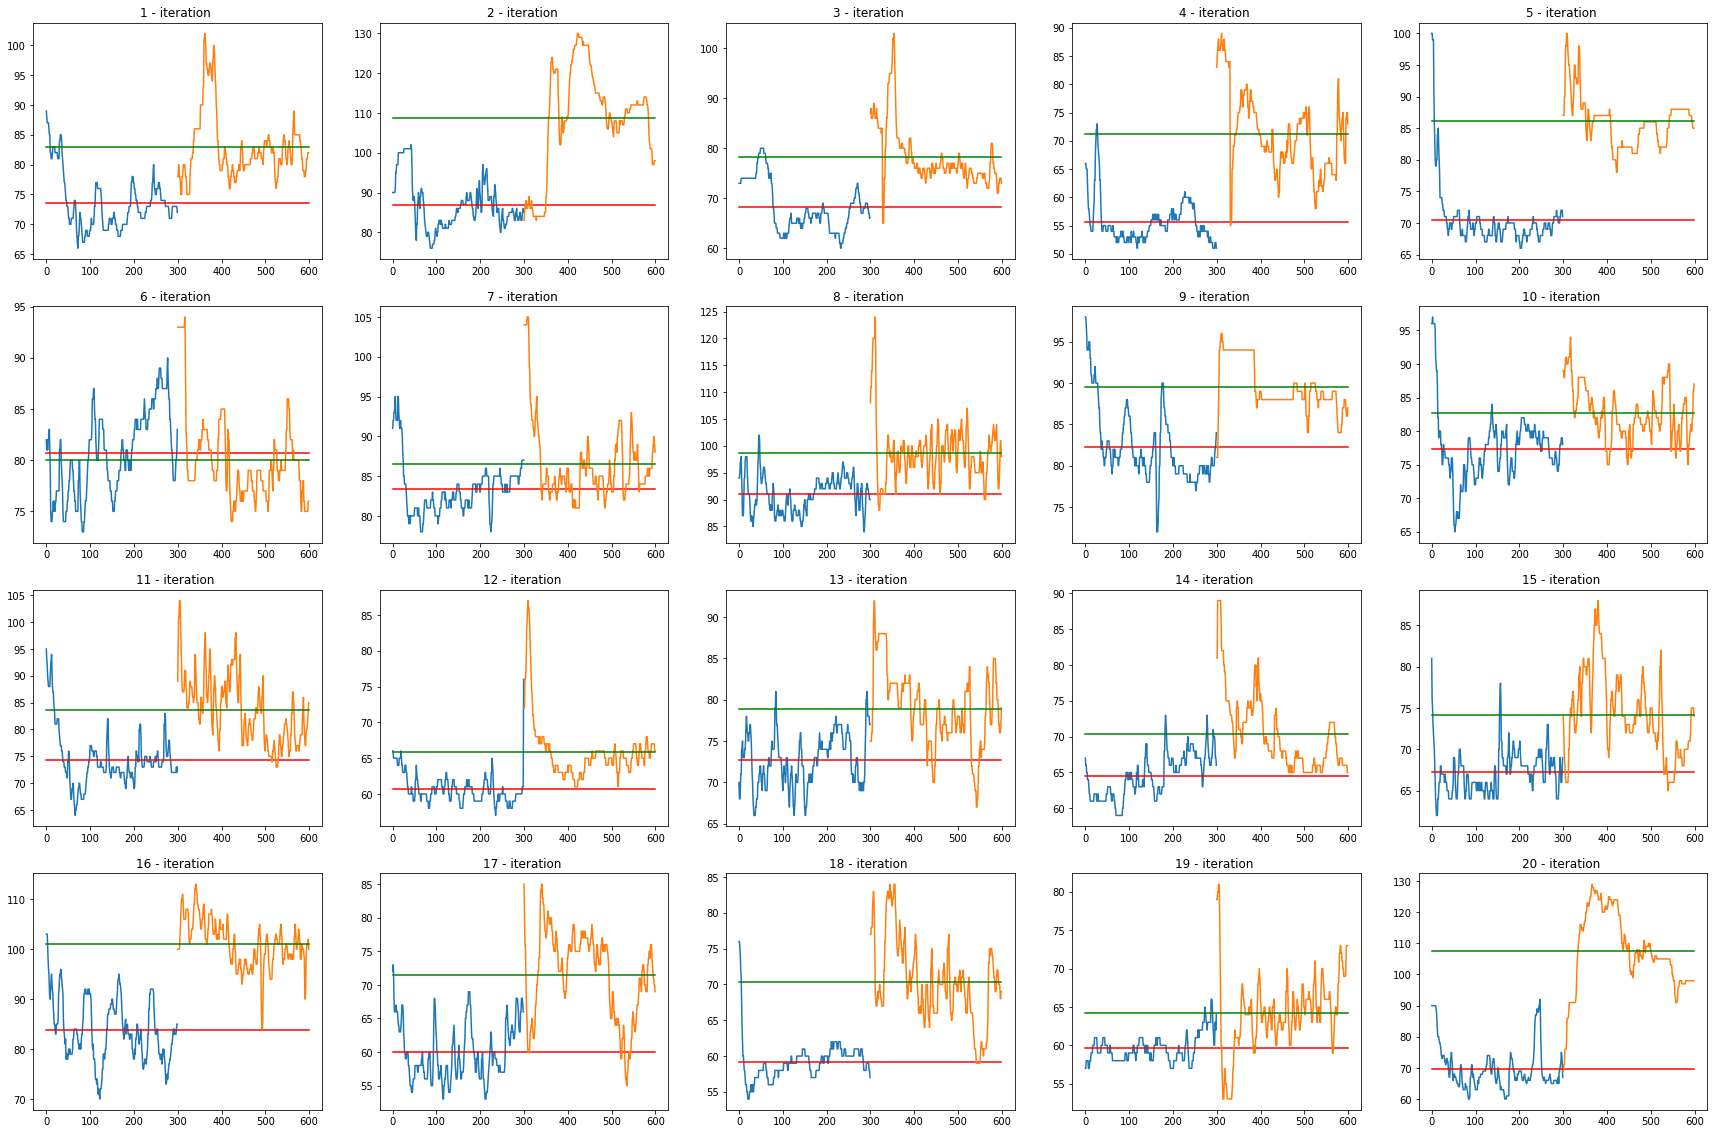

In [682]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 4, ncols = 5)
medium_ratios = np.array([])

for counter, k in enumerate(indexes_neuro):

    ax[(counter) // 5][counter % 5].plot(np.arange(300), neuro_data[k][:300],    label = 'First Relax Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(600) * neuro_data[k][:300].mean(), label = 'Mean Relax', color = 'Red')
    ax[(counter) // 5][counter % 5].plot(np.arange(300, 600), neuro_data[k][940:1240], label = 'First Stress Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(600) * neuro_data[k][940:1240].mean(), label = 'Mean Stress', color = 'Green')
    ax[(counter) // 5][counter % 5].set_title(indexes_neuro[counter] + ' - iteration ')

    medium_ratios = np.append(medium_ratios, neuro_data[k][300:600].mean() / neuro_data[k][940:1240].mean())
print('Emotional Stress rate approximately greater than relax in ', medium_ratios.mean(), '+-', medium_ratios.var())

#### First Relax vs Second Emotional Stress period ECG

Emotional Stress rate approximately greater than relax in  1.3101854361300345 +- 0.014729637972761955


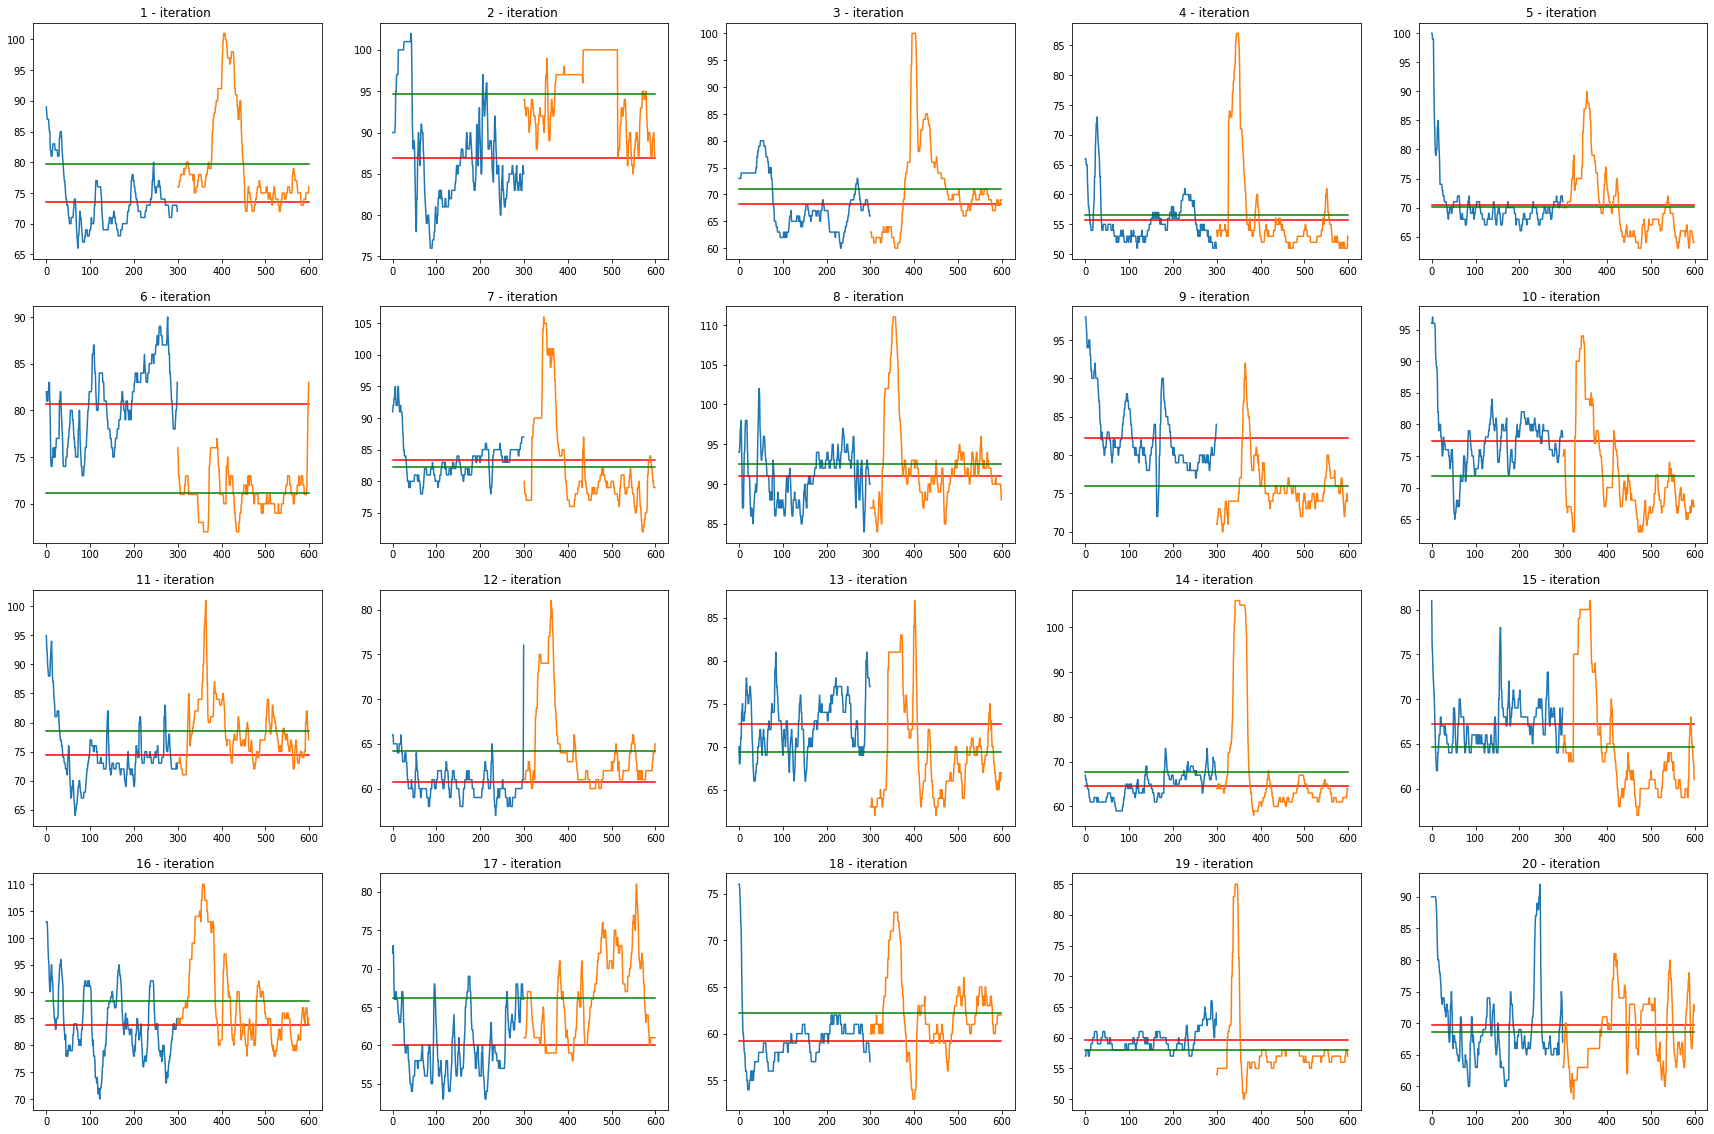

In [683]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 4, ncols = 5)
medium_ratios = np.array([])

for counter, k in enumerate(indexes_neuro):

    ax[(counter) // 5][counter % 5].plot(np.arange(300), neuro_data[k][:300],            label = 'First Relax Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(600) * neuro_data[k][:300].mean(),      label = 'Mean Relax', color = 'Red')
    ax[(counter) // 5][counter % 5].plot(np.arange(300, 600), neuro_data[k][1600:1900],  label = 'Second Stress Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(600) * neuro_data[k][1600:1900].mean(), label = 'Mean Stress', color = 'Green')
    ax[(counter) // 5][counter % 5].set_title(indexes_neuro[counter] + ' - iteration ')

    medium_ratios = np.append(medium_ratios, neuro_data[k][300:600].mean() / neuro_data[k][1600:1900].mean())
    
print('Emotional Stress rate approximately greater than relax in ', medium_ratios.mean(), '+-', medium_ratios.var())

#### First Relax VS Second Relax VS Third Relax Periods

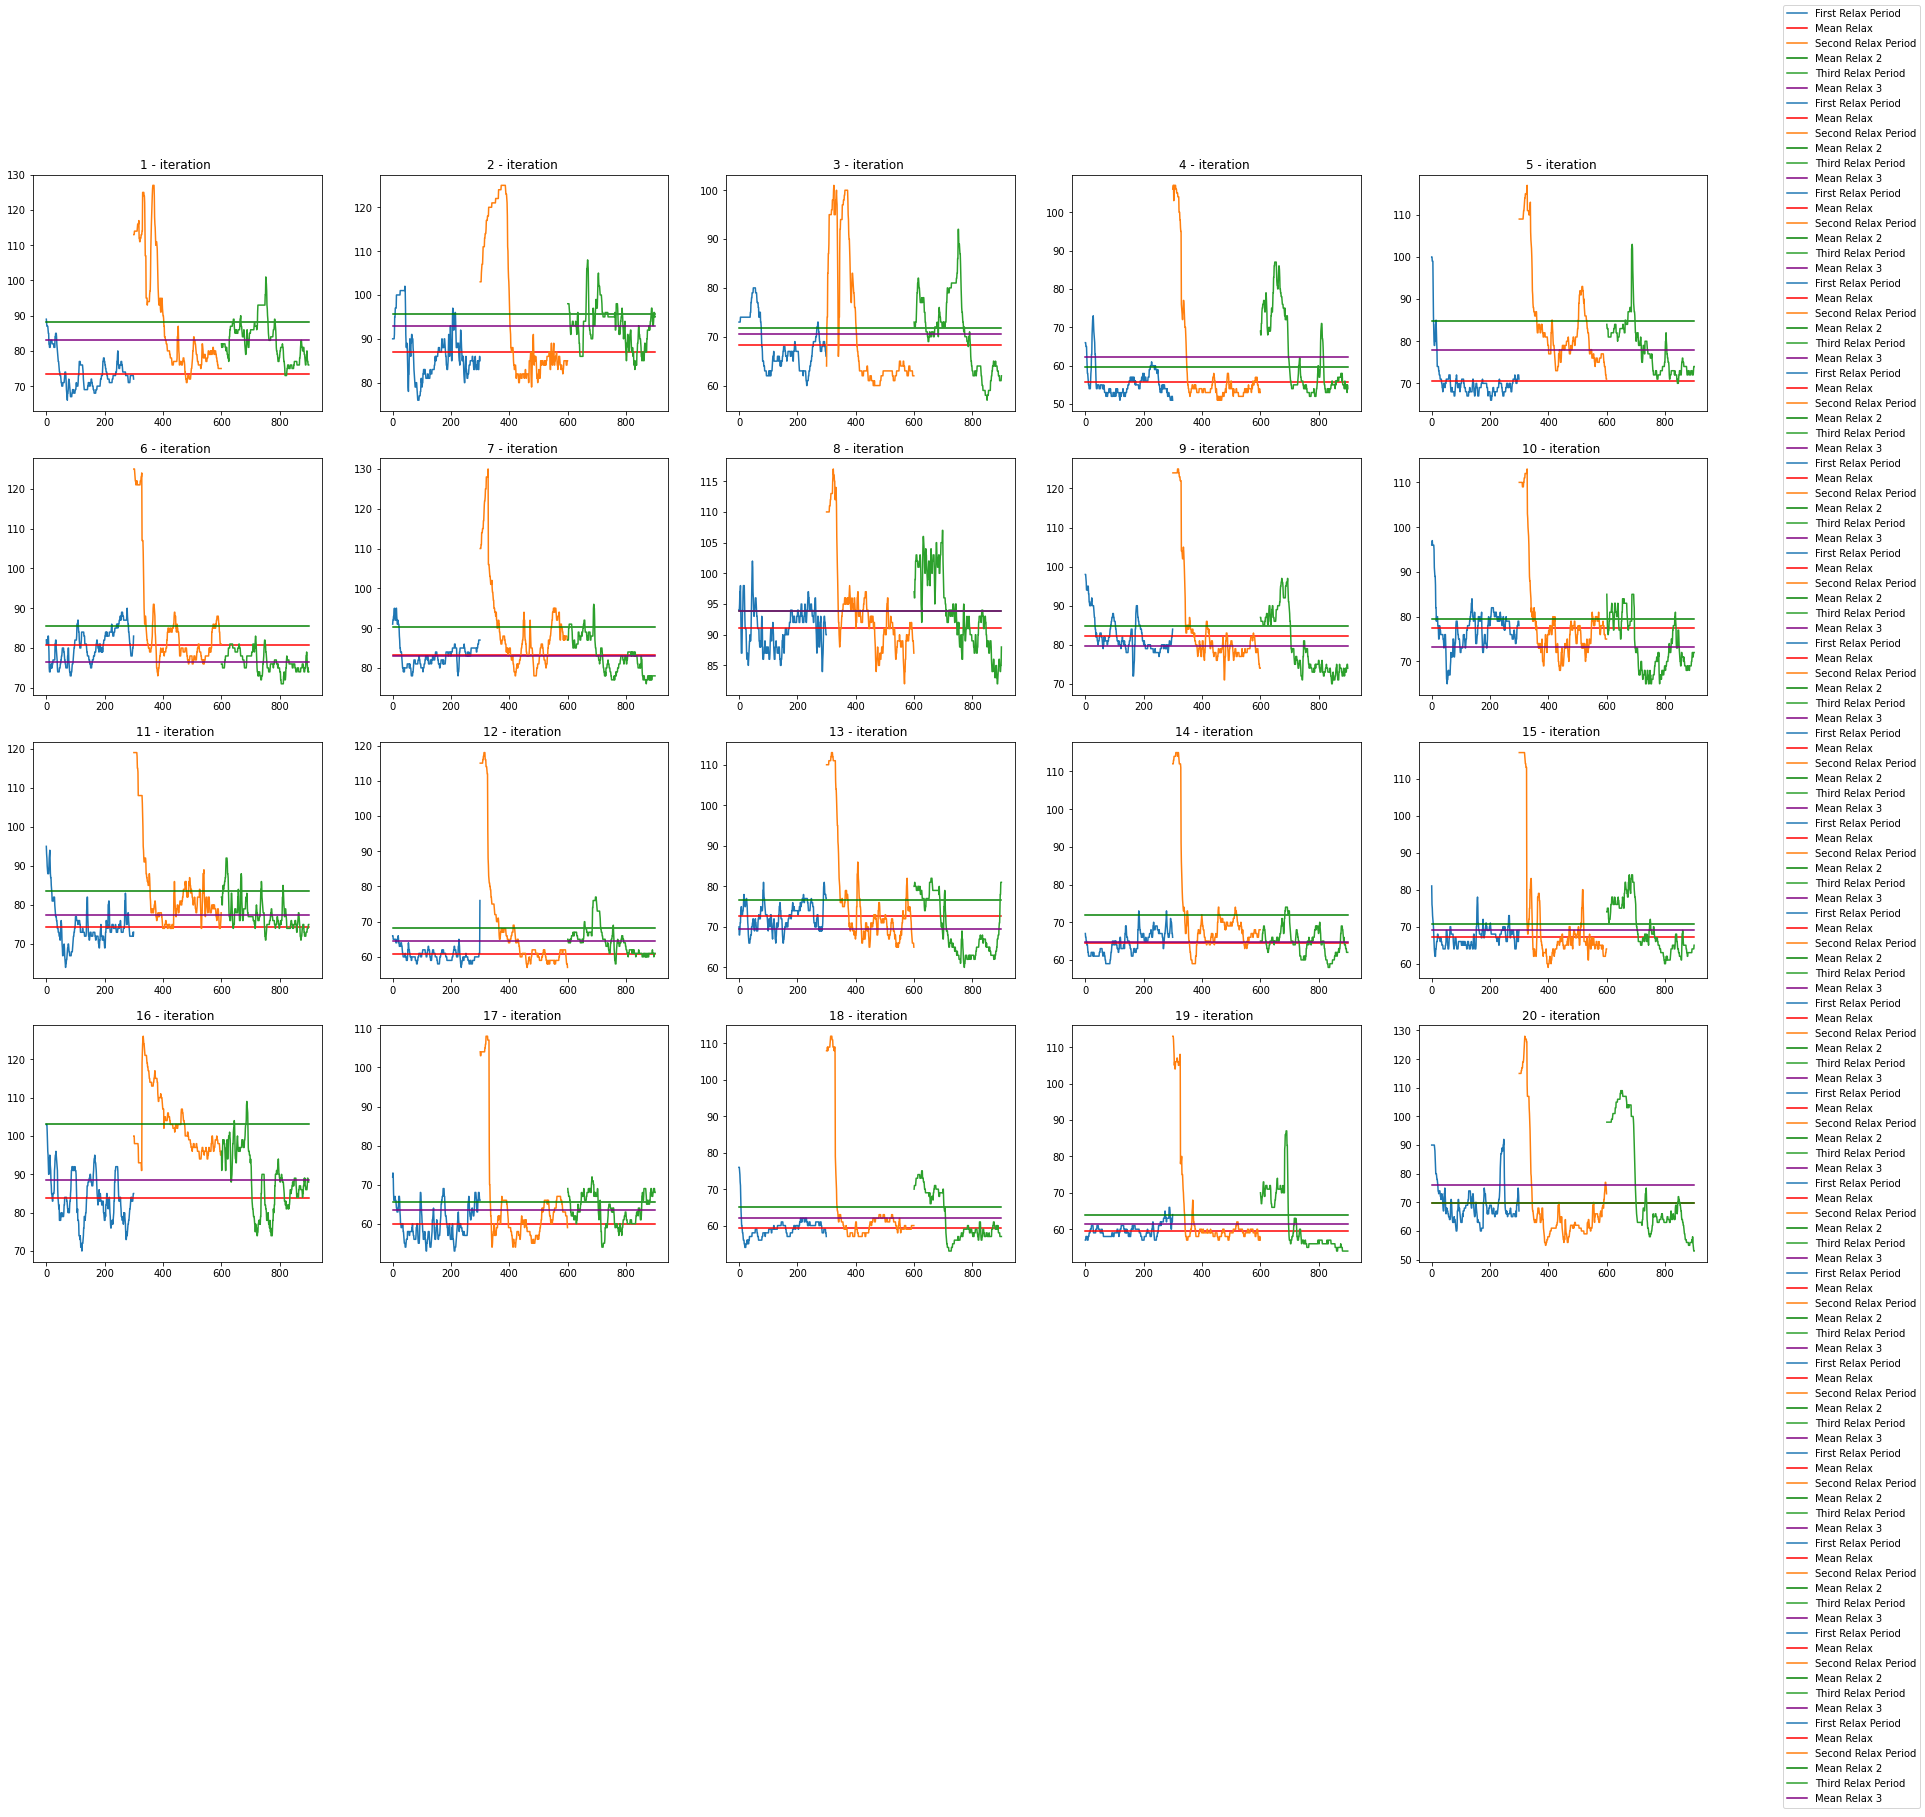

In [678]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 4, ncols = 5)

for counter, k in enumerate(indexes_neuro):

    ax[(counter) // 5][counter % 5].plot(np.arange(300), neuro_data[k][:300],            label = 'First Relax Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(900) * neuro_data[k][:300].mean(),      label = 'Mean Relax', color = 'Red')
    ax[(counter) // 5][counter % 5].plot(np.arange(300, 600), neuro_data[k][600:900],    label = 'Second Relax Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(900) * neuro_data[k][600:900].mean(),   label = 'Mean Relax 2', color = 'Green')
    ax[(counter) // 5][counter % 5].plot(np.arange(600, 900), neuro_data[k][1240:1540],  label = 'Third Relax Period')
    ax[(counter) // 5][counter % 5].plot(np.ones(900) * neuro_data[k][1240:1540].mean(), label = 'Mean Relax 3', color = 'Purple')
    ax[(counter) // 5][counter % 5].set_title(indexes_neuro[counter] + ' - iteration ')
fig.legend()

That's nearly obviously that before all sorts of triggers heart rate was the lowest during the experiment. And for the most of people in that experiment it's proven by the diagram above